In [86]:
#!pip install matplotlib
#!pip install matplotlib pandas.tools
#!pip install seaborn

In [87]:
import pandas as pd
import numpy as np
import mpld3 

import matplotlib.pyplot as plt
plt.style.use('ggplot')
#%matplotlib inline  

from pandas.plotting import scatter_matrix
import Config

### Exploratory Data Analysis:

In [88]:
# Load training data prepared previuosly
filepath =Config.data_wrangling
df = pd.read_csv(filepath)
df.fillna(0,inplace=True)
df.head()

,startDate,endDate,settings,lastCycleReached,id.engine.id,id.engine.maintenanceIndex,id.engine.lastTimeConnected,id.engine.description,id.engine.connected,id.cycle,...,sensorsMin.ax__max,sensorsMin.ay__max,sensorsMin.az__max,sensorsMin.temperature__max,sensorsMin.humidity__max,sensorsMin.temperatureIndex__max,lastCycle,labels.ttf,labels.bnc,labels.mcc
0,0,0,0,False,1,0,0,vehicula. Pellentesque tincidunt tempus risus....,False,0,...,-77.904986,-79.539219,-89.343668,0.0,0.0,0.0,4,4,0,0
1,0,0,0,False,1,0,0,vehicula. Pellentesque tincidunt tempus risus....,False,1,...,-88.504482,-89.364603,-86.998806,0.0,0.0,0.0,4,3,0,0
2,0,0,0,False,1,0,0,vehicula. Pellentesque tincidunt tempus risus....,False,2,...,-88.332153,-89.697292,-89.405550,0.0,0.0,0.0,4,2,0,0
3,0,0,0,False,1,0,0,vehicula. Pellentesque tincidunt tempus risus....,False,3,...,-75.930179,-87.669944,-88.780239,0.0,0.0,0.0,4,1,1,1
4,0,0,0,False,1,0,0,vehicula. Pellentesque tincidunt tempus risus....,False,4,...,-85.067708,-89.246504,-89.532829,0.0,0.0,0.0,4,0,1,2


In [89]:

sensors = [k for k in df.columns if 'sensor' in k]
settings = [k for k in df.columns if 'setting' in k]
features_to_study = sensors + settings

In [109]:
def plot_histogram(df,Logy=False,Figsize=(8,6),Title=''):
    df.sort_values(ascending=False,inplace=True)
    df_plot = df.plot(kind='bar', figsize=Figsize,logy=Logy, title=Title)
    df_fig = df_plot.get_figure()
    df_fig.savefig('static/images/'+Title.replace(' ','-')+'.svg')
    return df_fig

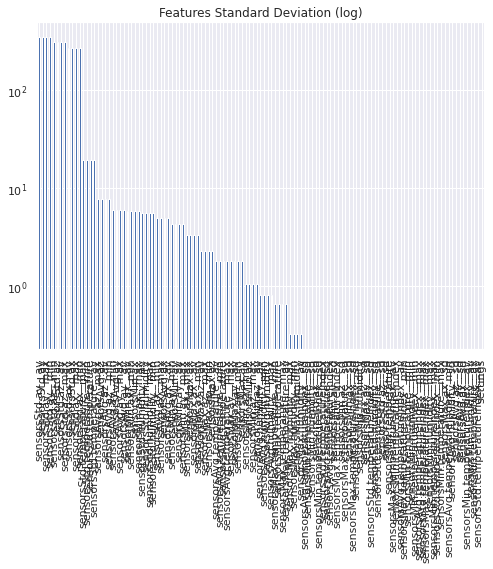

In [110]:
#plot and compare the standard deviation of input features:
std = df[features_to_study].std()
std_fig = plot_histogram(std,Title="Features Standard Deviation")
std_fig
# plot and compare the log standard deviation of input features:
stdLog_html = plot_histogram(std,Logy=True,Title="Features Standard Deviation (log)")

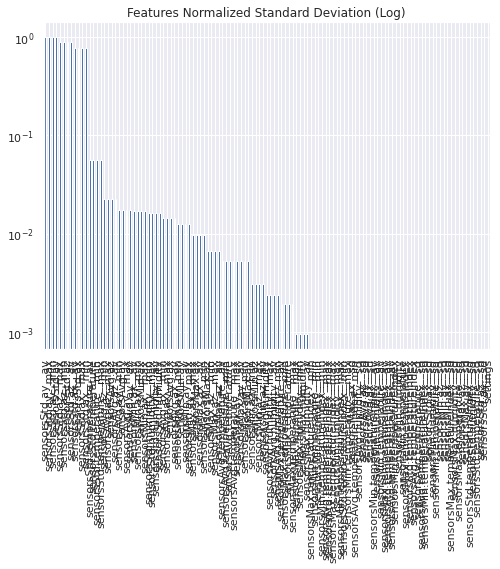

In [107]:
# get ordered list of top standard deviation features:
std_normalized = std/std.max()
std_normalized = std_normalized.sort_values(ascending=False)
# plot and compare the normalized standard deviation of input features:
std_normalized_fig = plot_histogram(std_normalized,Title="Features normalized Standard Deviation")
# plot and compare the log  normalized standard deviation of input features:
std_normalized_log_fig = plot_histogram(std_normalized,Logy=True,Title="Features Normalized Standard Deviation (Log)")

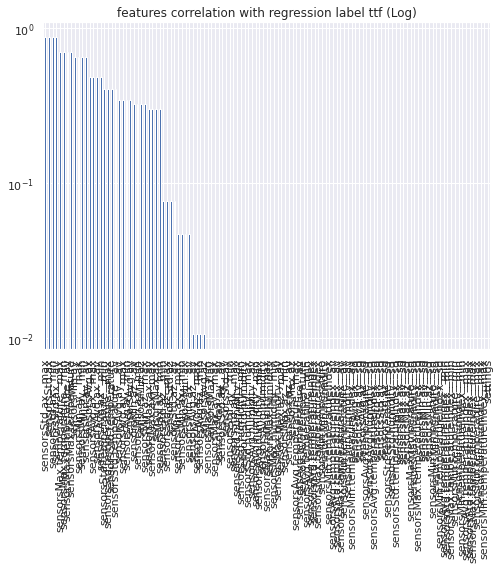

In [108]:
# get ordered list features correlation with regression label ttf

cor_ttf =df[features_to_study].corrwith(df['labels.ttf']).sort_values(ascending=False)
cor_ttf.fillna(0,inplace=True)
cor_ttf_fig = plot_histogram(cor_ttf,Title="features correlation with regression label ttf")
cor_ttf_log_fig = plot_histogram(cor_ttf,Logy=True,Title="features correlation with regression label ttf (Log)")

In [101]:
# list of features having low or no correlation with regression label ttf and very low or no std (SQRT(variance))
# These features will be target for removal in feature selection
def select_features_by_stdRate_and_correlation_with_ttf(corr_thresh=0.8,std_thresh=0.8,forRemoval=True):
    low_cor_ttf = ((cor_ttf <corr_thresh) &(cor_ttf > -corr_thresh) ) & (std_normalized < std_thresh)
    df_cor_std = pd.DataFrame(low_cor_ttf)
    df_cor_std.columns =["std&cor_low"]
    return df_cor_std[df_cor_std["std&cor_low"]==forRemoval].index.tolist()
select_features_by_stdRate_and_correlation_with_ttf()

['sensorsAvg.ax',
 'sensorsAvg.ax__av',
 'sensorsAvg.ax__max',
 'sensorsAvg.ax__min',
 'sensorsAvg.ax__sd',
 'sensorsAvg.ay',
 'sensorsAvg.ay__av',
 'sensorsAvg.ay__max',
 'sensorsAvg.ay__min',
 'sensorsAvg.ay__sd',
 'sensorsAvg.az',
 'sensorsAvg.az__av',
 'sensorsAvg.az__max',
 'sensorsAvg.az__min',
 'sensorsAvg.az__sd',
 'sensorsAvg.humidity',
 'sensorsAvg.humidity__av',
 'sensorsAvg.humidity__max',
 'sensorsAvg.humidity__min',
 'sensorsAvg.humidity__sd',
 'sensorsAvg.temperatureIndex',
 'sensorsAvg.temperatureIndex__av',
 'sensorsAvg.temperatureIndex__max',
 'sensorsAvg.temperatureIndex__min',
 'sensorsAvg.temperatureIndex__sd',
 'sensorsAvg.temperature__sd',
 'sensorsMax.ax',
 'sensorsMax.ax__av',
 'sensorsMax.ax__max',
 'sensorsMax.ax__min',
 'sensorsMax.ax__sd',
 'sensorsMax.ay',
 'sensorsMax.ay__av',
 'sensorsMax.ay__max',
 'sensorsMax.ay__min',
 'sensorsMax.ay__sd',
 'sensorsMax.az',
 'sensorsMax.az__av',
 'sensorsMax.az__max',
 'sensorsMax.az__min',
 'sensorsMax.az__sd',
 'sen

In [102]:
# list of features having high correlation with regression label ttf and High std
L=select_features_by_stdRate_and_correlation_with_ttf(forRemoval=False)
feat=df[L].describe()


Let us disply this correlation in heatmap

In [103]:
# add the regression label 'ttf' to the list of high corr features 

correl_featurs_lbl = L + ['labels.ttf']

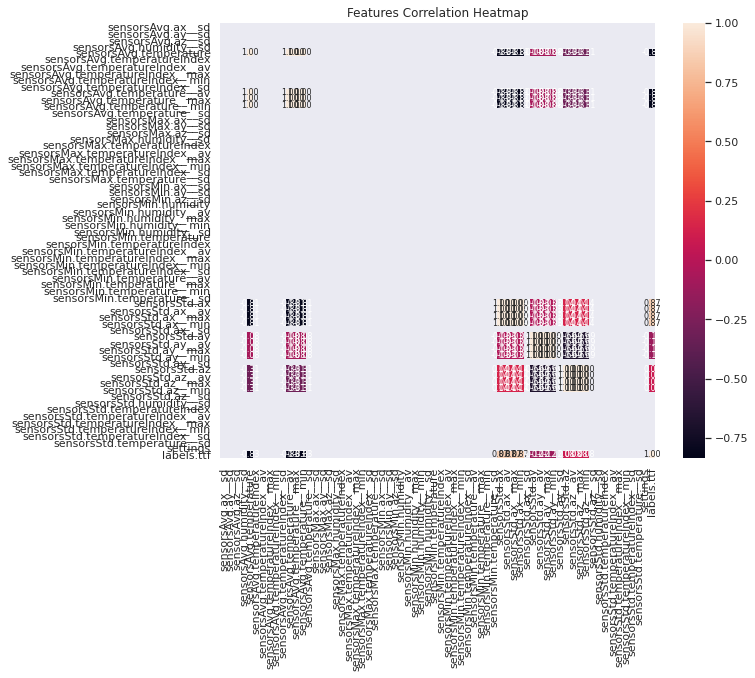

In [106]:
# plot a heatmap to display +ve and -ve correlation among features and regression label:

import seaborn as sns
cm = np.corrcoef(df[correl_featurs_lbl].values.T)
sns.set(font_scale=1.0)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=correl_featurs_lbl, xticklabels=correl_featurs_lbl)
plt.title('Features Correlation Heatmap')
plt.savefig('static/images/corrMatrix.svg')

In [ ]:

def explore_col(s, e):
    
    """Plot 4 main graphs for a single feature.
    
        plot1: histogram 
        plot2: boxplot 
        plot3: line plot (time series over cycle)
        plot4: scatter plot vs. regression label ttf
        
    Args:
        s (str): The column name of the feature to be plotted.
        e (int): The number of random engines to be plotted for plot 3. Range from 1 -100, 0:all engines, >100: all engines.

    Returns:
        plots
    
    """
    
    fig = plt.figure(figsize=(10, 8))


    sub1 = fig.add_subplot(221) 
    sub1.set_title(s +' histogram') 
    sub1.hist(df[s])

    sub2 = fig.add_subplot(222)
    sub2.set_title(s +' boxplot')
    sub2.boxplot(df[s])
    
    #np.random.seed(12345)
    
    if e > 100 or e <= 0:
        select_engines = list(pd.unique(df['id.engine.id']))
    else:
        select_engines = np.random.choice(range(1,101), e, replace=False)
        
    sub3 = fig.add_subplot(223)
    sub3.set_title('time series: ' + s +' / cycle')
    sub3.set_xlabel('cycle')
    for i in select_engines:
        dfi = df[['id.cycle', s]][(df['id.engine.id']== i) & (df['id.maintenanceIndex']==0)]
        #sub3.plot(df['id.cycle'],dfi[s])
    
    sub4 = fig.add_subplot(224)
    sub4.set_title("scatter: "+ s + " / ttf (regr label)")
    sub4.set_xlabel('ttf')
    sub4.scatter(df['labels.ttf'],df[s])


    plt.tight_layout()
    plt.show()